# 얕은 신경망을 이용한 다중 분류 문제

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
idx = 0

## 함수 구현

### Sigmoid 함수
$sigmoid(x) = 1/(1+e^{-x})$

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Softmax 함수
$softmax(x)_i = e^{x_i}/\sum{e^{x_j}}$

In [4]:
def softmax(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

## 네트워크 구조 정의

### 1.Hidden Layer 식
$h = a_h(w_h*x+b_h)$
- $a_h$는 sigmod함수 사용

### 2.Output Layer 식
$y = a_o(w_o*h+b_o)$
- $a_o는 softmax함수 사용

In [5]:
# Define network architecture
class ShallowNN:
    def __init__(self, num_input, num_hidden, num_output): # input=2, hidden=128, output=10
        # zeros(shape, dtype=float, order='C')
        self.W_h = np.zeros((num_hidden, num_input), dtype=np.float32)  # 128 x 2
        self.b_h = np.zeros((num_hidden,), dtype=np.float32)
        self.W_o = np.zeros((num_output, num_hidden), dtype=np.float32) # 10 x 128
        self.b_o = np.zeros((num_output,), dtype=np.float32)
        
    def __call__(self, x):
        
        global idx # Global 변수 참조
        
        # Hidden layer의 a(함수)는 sigmod를 사용함
        # Fully Connected Layer이기 때문에 모든 Hidden Layer에 입력값 x를 곱해주고
        # bais를 더해 줌
        h = sigmoid(np.matmul(self.W_h, x) + self.b_h)
        
        if idx == 0:
            print('W_h => ',self.W_h)
            print('x => ',x)
            print('matmul => ',np.matmul(self.W_h, x))
            print('b_h => ',self.b_h)
            print('h => ', h)
        
        # Output layer의 a(함수)는 softmax를 사용함
        # Fully Connected Layer이기 때문에 모든 Output Layer에 입력값 h를 곱해주고
        # bais를 더해 줌
        o = softmax(np.matmul(self.W_o, h) + self.b_o)
        if idx == 0:        
            print('W_o => ',self.W_o)
            print('matmul => ',np.matmul(self.W_h, x))
            print('b_o => ',self.b_o)
            print('o => ', o)
        idx += 1    
        return o

## 데이터셋 가져오기, 정리하기

In [6]:
# Import and organize dataset
dataset = np.load('../dataset/ch2_dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']
print(inputs.shape, labels.shape)
inputs, labels

(1000, 2) (1000,)


(array([[ 2.27509514,  3.2378716 ],
        [ 1.09408376,  2.58893412],
        [-1.77197375,  4.09664846],
        ...,
        [ 4.82168057,  4.93037182],
        [ 5.09413929,  6.60909104],
        [ 4.72515522,  5.31657394]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 

## 모델 만들기

In [7]:
# Create Model
model = ShallowNN(2, 128, 10) # num_input, num_hidden, num_output

## 사전에 학습된 파라미터 불러오기

In [8]:
weights = np.load('../dataset/ch2_parameters.npz')
# 만들어진 model의 속성에 W_h, b_h, W_o, b_o 값을 할당함
model.W_h = weights['W_h']
model.b_h = weights['b_h']
model.W_o = weights['W_o']
model.b_o = weights['b_o']

print(model.W_h.shape, model.b_h.shape, model.W_o.shape, model.b_o.shape)
model.W_h[:10], model.b_h[:10], model.W_o[:10], model.b_o[:10]

(128, 2) (128,) (10, 128) (10,)


(array([[-0.45040877, -0.43105796],
        [-0.42920333, -0.12722362],
        [-0.29418066,  0.17258409],
        [-0.59840781,  0.01054679],
        [ 3.43182118, -0.16056914],
        [-0.27710168,  0.3124364 ],
        [ 0.54137995, -0.31492026],
        [ 0.01655464,  0.35912071],
        [-0.5026344 , -0.0799901 ],
        [ 0.68080784,  0.25196696]]),
 array([ 0.95364524,  0.86885165,  0.27944264,  0.26466292, -0.89775878,
         0.6108867 ,  1.0963854 , -0.68067748,  1.2526766 ,  0.26669868]),
 array([[-0.28979355,  0.09111546, -0.05175861, ...,  0.14342747,
         -0.07248374,  0.06410813],
        [ 0.5978904 ,  0.20081695, -0.08125224, ..., -0.42451592,
         -0.40019614, -0.04157701],
        [ 0.57855109, -0.03898778, -0.15267319, ..., -0.28328135,
          0.46766261,  0.1881512 ],
        ...,
        [ 0.63700544,  0.41648436,  0.45869043, ..., -2.21194906,
          0.65039981, -0.07504467],
        [ 1.38155276,  0.84005071,  0.97190522, ..., -1.25203676,
   

## 모델 구동 및 결과 프린트

In [9]:
outputs = list()
idx = 0
for pt, label in zip(inputs, labels):
    output = model(pt)
#    if idx == 0: 
#        print(label, pt, output)
    outputs.append(np.argmax(output))
    print(idx, '--> ', np.argmax(output), label, np.argmax(output)==label)
    idx += 1
    
print(outputs)
outputs = np.stack(outputs, axis=0).astype(np.float32) # 열을 행으로 변환
print(outputs.shape)

W_h =>  [[-0.45040877 -0.43105796]
 [-0.42920333 -0.12722362]
 [-0.29418066  0.17258409]
 [-0.59840781  0.01054679]
 [ 3.43182118 -0.16056914]
 [-0.27710168  0.3124364 ]
 [ 0.54137995 -0.31492026]
 [ 0.01655464  0.35912071]
 [-0.5026344  -0.0799901 ]
 [ 0.68080784  0.25196696]
 [ 0.10307142 -0.43910924]
 [ 0.09371816 -0.43340348]
 [ 0.66505588  0.20066344]
 [ 0.01411892 -0.43616819]
 [ 0.15868309 -0.43418279]
 [-0.13241138  0.27551888]
 [-0.43439724 -0.25741457]
 [ 1.2792551   1.00072807]
 [-0.54150043 -0.2574065 ]
 [ 0.61189599  0.26854985]
 [-0.36654531 -0.27099034]
 [-0.06412748  0.65571066]
 [ 2.52398209  3.079472  ]
 [-0.19275974  0.3426605 ]
 [ 0.48742136 -0.87615184]
 [ 0.21279137 -0.29732776]
 [-0.38720155  0.08222868]
 [-0.34735393  2.93475951]
 [ 1.94817787  0.00981829]
 [ 0.85924145 -0.79572321]
 [ 0.36248981  0.31094148]
 [ 0.16930746 -0.43257485]
 [-0.4928992   0.07665396]
 [-2.1844233  -0.55385286]
 [-0.67692826  0.75207194]
 [ 0.22086001 -0.42760132]
 [ 0.84206611 -1.805

365 -->  1 1 True
367 -->  2 1 False
369 -->  1 1 True
371 -->  1 1 True
373 -->  1 1 True
375 -->  1 1 True
377 -->  1 1 True
379 -->  1 1 True
381 -->  1 1 True
383 -->  1 1 True
385 -->  1 1 True
387 -->  1 1 True
389 -->  1 1 True
391 -->  1 1 True
393 -->  1 1 True
395 -->  1 1 True
397 -->  1 1 True
399 -->  1 1 True
401 -->  2 2 True
403 -->  0 2 False
405 -->  0 2 False
407 -->  2 2 True
409 -->  2 2 True
411 -->  2 2 True
413 -->  2 2 True
415 -->  2 2 True
417 -->  2 2 True
419 -->  2 2 True
421 -->  2 2 True
423 -->  2 2 True
425 -->  2 2 True
427 -->  2 2 True
429 -->  2 2 True
431 -->  2 2 True
433 -->  2 2 True
435 -->  2 2 True
437 -->  2 2 True
439 -->  3 2 False
441 -->  2 2 True
443 -->  2 2 True
445 -->  2 2 True
447 -->  2 2 True
449 -->  3 2 False
451 -->  2 2 True
453 -->  2 2 True
455 -->  2 2 True
457 -->  2 2 True
459 -->  0 2 False
461 -->  1 2 False
463 -->  0 2 False
465 -->  0 2 False
467 -->  2 2 True
469 -->  2 2 True
471 -->  0 2 False
473 -->  2 2 True


1363 -->  6 6 True
1365 -->  6 6 True
1367 -->  6 6 True
1369 -->  6 6 True
1371 -->  6 6 True
1373 -->  6 6 True
1375 -->  6 6 True
1377 -->  6 6 True
1379 -->  6 6 True
1381 -->  0 6 False
1383 -->  6 6 True
1385 -->  6 6 True
1387 -->  6 6 True
1389 -->  6 6 True
1391 -->  6 6 True
1393 -->  9 6 False
1395 -->  6 6 True
1397 -->  6 6 True
1399 -->  6 6 True
1401 -->  7 7 True
1403 -->  7 7 True
1405 -->  7 7 True
1407 -->  7 7 True
1409 -->  7 7 True
1411 -->  7 7 True
1413 -->  7 7 True
1415 -->  7 7 True
1417 -->  7 7 True
1419 -->  7 7 True
1421 -->  7 7 True
1423 -->  7 7 True
1425 -->  7 7 True
1427 -->  7 7 True
1429 -->  7 7 True
1431 -->  7 7 True
1433 -->  7 7 True
1435 -->  7 7 True
1437 -->  7 7 True
1439 -->  7 7 True
1441 -->  7 7 True
1443 -->  7 7 True
1445 -->  7 7 True
1447 -->  7 7 True
1449 -->  7 7 True
1451 -->  7 7 True
1453 -->  7 7 True
1455 -->  7 7 True
1457 -->  7 7 True
1459 -->  7 7 True
1461 -->  7 7 True
1463 -->  7 7 True
1465 -->  7 7 True
1467 -->  

## 정답 클래스 스캐터 플랏

In [10]:
list1 = [1,2,3]
array1 = np.array(list1)
print(type(list1), type(array1))
#print(list1.shape, array1.shape)
print(list1, array1)
print(list1[0], list1[1])
print(array1[0], array1[1])
list1[0] = 4
array1[0] = 4
print(list1[0], array1[0])

<class 'list'> <class 'numpy.ndarray'>
[1, 2, 3] [1 2 3]
1 2
1 2
4 4


In [11]:
print(type(inputs), type(labels))
print(inputs.shape, labels.shape)
print(labels,inputs)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1000, 2) (1000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [12]:
for idx in range(10):
    mask = labels == idx
    print('##########################################################')    
    print(mask.shape, mask)
    print('----------------------------------------------------------')       
    print(inputs[mask, 0], len(inputs[mask, 0]),inputs[mask, 0].shape)
    print('----------------------------------------------------------')       
    print(inputs[mask, 1], len(inputs[mask, 1]))

##########################################################
(1000,) [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False Fa

 6.15590203 6.91342329 5.61041697 8.00424701] 100
##########################################################
(1000,) [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False 

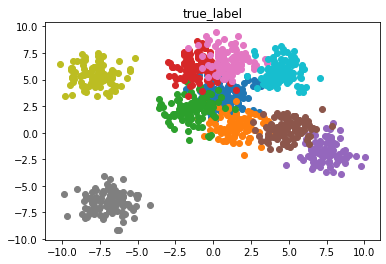

In [13]:
plt.figure()
for idx in range(10): #1에서 10까지 값을 번갈아 가면서 확인해서 볼것
    mask = labels == idx
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('true_label')
plt.show()

# plt.figure()
# for idx in range(5): #1에서 10까지 값을 번갈아 가면서 확인해서 볼것
#     mask = labels == idx
#     plt.scatter(inputs[mask, 0], inputs[mask, 1])
# plt.title('true_label')
# plt.show()

# plt.figure()
# for idx in range(3): #1에서 10까지 값을 번갈아 가면서 확인해서 볼것
#     mask = labels == idx
#     plt.scatter(inputs[mask, 0], inputs[mask, 1])
# plt.title('true_label')
# plt.show()

## 모델 출력 클래스 스캐터 플랏

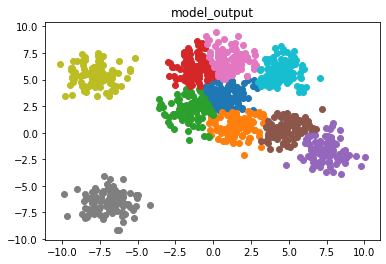

In [14]:
plt.figure()
for idx in range(10):
    mask = outputs == idx
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('model_output')
plt.show()

# plt.figure()
# for idx in range(5):
#     mask = outputs == idx
#     plt.scatter(inputs[mask, 0], inputs[mask, 1])
# plt.title('model_output')
# plt.show()

# plt.figure()
# for idx in range(3):
#     mask = outputs == idx
#     plt.scatter(inputs[mask, 0], inputs[mask, 1])
# plt.title('model_output')
# plt.show()